In [173]:
import numpy as np
import pandas as pd

In [174]:
import warnings
warnings.filterwarnings("ignore")

# ЗАГРУЗКА ДАННЫХ

In [219]:
path_1 = 'data/250218.csv'
path_2 = 'data/250219.csv'

data_1 = pd.read_csv(path_1, delimiter=';')
data_2 = pd.read_csv(path_2, delimiter=';')

# data_1 = data_1[data_1['Timestamp'] != 'Timestamp']

In [220]:
print('data_1 stops:', len(data_1[data_1['Timestamp'] == 'Timestamp']))
print('data_2 stops:', len(data_2[data_2['Timestamp'] == 'Timestamp']))

data_1 stops: 16
data_2 stops: 13


In [221]:
data_1.describe()

,Timestamp,Cpu regime,Current failure,Failure code block,Comand_vector #0,Comand_vector #1,Block connection # 0,Block connection # 1,Block connection # 2,Block connection # 3,...,SO Angle 7 2,SO Angle 7 3,SO Angle 8 1,SO Angle 8 2,SO Angle 8 3,Work time PUD,Work time CPU,Automatic flag,Automatic regime,Automatic step
count,4022,4023,4023,4023,4023,4023,4023,4023,4023,4023,...,4023,4023,4023,4023,4023,4023,4023,4023,4023,4023
unique,4007,5,2,2,23,8,10,11,10,9,...,2,2,2,2,2,3,2,2,2,2
top,Timestamp,06,0000000000000000,0000000000000000,0000000000000000,0000000000000011,"100,000 %","100,000 %","100,000 %","100,000 %",...,0000,0000,0000,0000,0000,00013,00000,00,00,00
freq,16,2499,4006,4006,3537,3182,1059,1228,1229,1850,...,4006,4006,4006,4006,4006,2054,4006,4006,4006,4006


In [222]:
data_2.describe()

,Timestamp,Cpu regime,Current failure,Failure code block,Comand_vector #0,Comand_vector #1,Block connection # 0,Block connection # 1,Block connection # 2,Block connection # 3,...,SO Angle 7 2,SO Angle 7 3,SO Angle 8 1,SO Angle 8 2,SO Angle 8 3,Work time PUD,Work time CPU,Automatic flag,Automatic regime,Automatic step
count,9050,9050,9050,9050,9050,9050,9050,9050,9050,9050,...,9050,9050,9050,9050,9050,9050,9050,9050,9050,9050
unique,9038,6,2,2,24,11,11,10,11,10,...,2,2,2,2,2,3,2,2,2,2
top,Timestamp,06,0000000000000000,0000000000000000,0000000000000000,0000000000000000,"100,000 %","100,000 %","100,000 %","100,000 %",...,0000,0000,0000,0000,0000,00013,00000,00,00,00
freq,13,4401,9037,9037,8674,3708,2479,2877,2771,4421,...,9037,9037,9037,9037,9037,4879,9037,9037,9037,9037


In [223]:
def delete_zero_segments(data):
    stops_idx = data[data['Timestamp'] == 'Timestamp'].index
    non_zero_dfs = []

    for idx in range(len(stops_idx) - 1):
        segment = data[stops_idx[idx] + 1:stops_idx[idx + 1]]
        if len(segment['Comand_vector #0'].unique()) > 1:
            non_zero_dfs.append(segment)

    new_data = non_zero_dfs[0]
    for i in range(1, len(non_zero_dfs)):
        new_data = pd.concat([new_data, non_zero_dfs[i]], ignore_index=True)
    return new_data

In [224]:
data_1 = delete_zero_segments(data_1)
data_2 = delete_zero_segments(data_2)

In [225]:
command_vector_0_masks = {
    "R1_1": 0x1,
    "R1_2": 0x2,
    "R2_1": 0x4,
    "R2_2": 0x8,
    "R3_1": 0x10,
    "R3_2": 0x20,
    "R4_1": 0x40,
    "R4_2": 0x80,
    "R5_1": 0x100,
    "R5_2": 0x200,
    "R6_1": 0x400,
    "R6_2": 0x800,
    "R7_1": 0x1000,
    "R7_2": 0x2000,
    "R8_1": 0x4000,
    "R8_2": 0x8000,
    "R9_1": 0x10000,
    "R9_2": 0x20000,
    "R10_1": 0x40000,
    "R10_2": 0x80000,
    "R11_1": 0x100000,
    "R11_2": 0x200000,
    "R12_1": 0x400000,
    "R12_2": 0x800000,
    "R13_1": 0x1000000,
    "R13_2": 0x2000000,
    "R14_1": 0x4000000,
    "R14_2": 0x8000000,
    "R15_1": 0x10000000,
    "R15_2": 0x20000000,
    "R16_1": 0x40000000,
    "R16_2": 0x80000000,
    "R17_1": 0x100000000,
    "R17_2": 0x200000000,
    "R18_1": 0x400000000,
    "R18_2": 0x800000000,
    "R19_1": 0x1000000000,
    "R19_2": 0x2000000000,
    "R20_1": 0x4000000000,
    "R20_2": 0x8000000000,
    "R21_1": 0x10000000000,
    "R21_2": 0x20000000000,
    "R22_1": 0x40000000000,
    "R22_2": 0x80000000000,
    "R23_1": 0x100000000000,
    "R23_2": 0x200000000000,
    "R24_1": 0x400000000000,
    "R24_2": 0x800000000000,
    "R25_1": 0x1000000000000,
    "R25_2": 0x2000000000000,
    "R26_1": 0x4000000000000,
    "R26_2": 0x8000000000000,
    "R27_1": 0x10000000000000,
    "R27_2": 0x20000000000000,
    "R28_1": 0x40000000000000,
    "R28_2": 0x80000000000000,
    "R29_1": 0x100000000000000,
    "R29_2": 0x200000000000000,
    "R30_1": 0x400000000000000,
    "R30_2": 0x800000000000000,
    "R31_1": 0x1000000000000000,
    "R31_2": 0x2000000000000000,
    "R32_1": 0x4000000000000000,
    "R32_2": 0x8000000000000000
}
len(command_vector_0_masks)

64

In [226]:
def decode_command_vector(hex_str):
    value = int(hex_str, 16)
    active_commands = []
    for name, mask in command_vector_0_masks.items():
        if value & mask:
            active_commands.append(name)
    return active_commands, [hex(command_vector_0_masks[i]) for i in active_commands]

In [227]:
unique_comand2 = data_2[data_2['Comand_vector #0'] != 'Comand_vector #0']['Comand_vector #0'].unique()

comands2 = []
for i in unique_comand2:
    decoded = decode_command_vector(i)
    # print(f'{i}\n{decoded}\n')
    comands2.extend(decoded[0])

print(sorted(list(set(comands2))))

['R11_1', 'R11_2', 'R12_1', 'R12_2', 'R13_1', 'R13_2', 'R15_1', 'R15_2', 'R3_1', 'R4_1', 'R5_1', 'R6_1', 'R6_2', 'R7_1', 'R7_2', 'R8_1', 'R8_2']


In [228]:
f = lambda hex_str: tuple(decode_command_vector(hex_str)[0])

data_1['decoded_comand #0'] = data_1[data_1['Comand_vector #0'] != 'Comand_vector #0']['Comand_vector #0'].apply(f)
data_2['decoded_comand #0'] = data_2[data_2['Comand_vector #0'] != 'Comand_vector #0']['Comand_vector #0'].apply(f)

In [229]:
pdu_joy_masks = {
    "FORWARD": 0x1000,
    "BACK": 0x2000,
    "LEFT": 0x4000,
    "RIGHT": 0x8000,
    "BTN_LEFT": 0x0100,
    "BTN_RIGHT": 0x0200,
    "L_AFTER_DEV": 0x0400,
    "R_AFRER_DEV": 0x0800,
}

In [230]:
def decode_pdu_joy(hex_str):
    value = int(hex_str, 16)
    data = []
    for name, mask in pdu_joy_masks.items():
        if value & mask:
            data.append(name)
    data.append(value & 0xFF)
    return tuple(data)

In [231]:
btns = lambda hex_str: decode_pdu_joy(hex_str)[:-1] if 'PDU Joy' not in hex_str else ()
dev = lambda hex_str: (decode_pdu_joy(hex_str)[-1]) / 100 if 'PDU Joy' not in hex_str else 0
for i in range(1, 4):
    data_1[f'decoded_joy{i}_btns'] = data_1[f'PDU Joy{i}'].apply(btns)
    data_1[f'deviation_joy{i}'] = data_1[f'PDU Joy{i}'].apply(dev)

    data_2[f'decoded_joy{i}_btns'] = data_2[f'PDU Joy{i}'].apply(btns)
    data_2[f'deviation_joy{i}'] = data_2[f'PDU Joy{i}'].apply(dev)

In [232]:
print(data_1['decoded_joy1_btns'].unique())
print(data_1['decoded_joy2_btns'].unique())
print(data_1['decoded_joy3_btns'].unique())

[() ('LEFT',) ('RIGHT',) ('FORWARD',) ('BACK',)]
[() ('FORWARD',) ('RIGHT',) ('BACK',) ('RIGHT', 'BTN_LEFT')
 ('LEFT', 'BTN_LEFT') ('FORWARD', 'BTN_LEFT') ('BACK', 'BTN_LEFT')]
[()]


In [233]:
print(data_2['decoded_joy1_btns'].unique())
print(data_2['decoded_joy2_btns'].unique())
print(data_2['decoded_joy3_btns'].unique())

[() ('FORWARD',) ('BACK',) ('FORWARD', 'BTN_RIGHT') ('BACK', 'BTN_RIGHT')
 ('BACK', 'BTN_LEFT') ('LEFT',) ('RIGHT',)]
[() ('RIGHT', 'BTN_LEFT') ('FORWARD',) ('LEFT', 'BTN_LEFT') ('BACK',)
 ('FORWARD', 'BTN_RIGHT') ('BACK', 'BTN_RIGHT')]
[()]


one-hot encoding

In [234]:
data_1[data_1['Timestamp'] == 'Timestamp'] # 405
data_2[data_2['Timestamp'] == 'Timestamp'] # 734

,Timestamp,Cpu regime,Current failure,Failure code block,Comand_vector #0,Comand_vector #1,Block connection # 0,Block connection # 1,Block connection # 2,Block connection # 3,...,Automatic flag,Automatic regime,Automatic step,decoded_comand #0,decoded_joy1_btns,deviation_joy1,decoded_joy2_btns,deviation_joy2,decoded_joy3_btns,deviation_joy3


In [235]:
data_1.at[405, 'decoded_comand #0'] = tuple(command_vector_0_masks.keys())[:30]
data_1.at[405, 'decoded_joy1_btns'] = tuple(pdu_joy_masks.keys())
data_1.at[405, 'decoded_joy2_btns'] = tuple(pdu_joy_masks.keys())
data_1.at[405, 'decoded_joy3_btns'] = tuple(pdu_joy_masks.keys())
# data_1['decoded_comand #0'].unique()

data_2.at[734, 'decoded_comand #0'] = tuple(command_vector_0_masks.keys())[:30]
data_2.at[405, 'decoded_joy1_btns'] = tuple(pdu_joy_masks.keys())
data_2.at[405, 'decoded_joy2_btns'] = tuple(pdu_joy_masks.keys())
data_2.at[405, 'decoded_joy3_btns'] = tuple(pdu_joy_masks.keys())
# data_2['decoded_comand #0'].unique()

In [236]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb1 = MultiLabelBinarizer()
mlb_joy1 = MultiLabelBinarizer()
mlb_joy2 = MultiLabelBinarizer()
mlb_joy3 = MultiLabelBinarizer()


ohe_data_1 = mlb1.fit_transform(data_1['decoded_comand #0'].apply(lambda x: x if isinstance(x, tuple) else ()))
ohe_data_2 = mlb1.fit_transform(data_2['decoded_comand #0'].apply(lambda x: x if isinstance(x, tuple) else ()))

ohe_data_1_joy1 = mlb_joy1.fit_transform(data_1['decoded_joy1_btns'].apply(lambda x: x if isinstance(x, tuple) else ()))
ohe_data_1_joy2 = mlb_joy2.fit_transform(data_1['decoded_joy2_btns'].apply(lambda x: x if isinstance(x, tuple) else ()))
ohe_data_1_joy3 = mlb_joy3.fit_transform(data_1['decoded_joy3_btns'].apply(lambda x: x if isinstance(x, tuple) else ()))

ohe_data_2_joy1 = mlb_joy1.fit_transform(data_2['decoded_joy1_btns'].apply(lambda x: x if isinstance(x, tuple) else ()))
ohe_data_2_joy2 = mlb_joy2.fit_transform(data_2['decoded_joy2_btns'].apply(lambda x: x if isinstance(x, tuple) else ()))
ohe_data_2_joy3 = mlb_joy3.fit_transform(data_2['decoded_joy3_btns'].apply(lambda x: x if isinstance(x, tuple) else ()))

ohe_df1 = pd.DataFrame(ohe_data_1, columns=mlb1.classes_)
ohe_df2 = pd.DataFrame(ohe_data_2, columns=mlb1.classes_)

ohe_df1_joy1 = pd.DataFrame(ohe_data_1_joy1, columns=[f'{col}_Joy1' for col in mlb_joy1.classes_])
ohe_df1_joy2 = pd.DataFrame(ohe_data_1_joy2, columns=[f'{col}_Joy2' for col in mlb_joy2.classes_])
ohe_df1_joy3 = pd.DataFrame(ohe_data_1_joy3, columns=[f'{col}_Joy3' for col in mlb_joy3.classes_])

ohe_df2_joy1 = pd.DataFrame(ohe_data_2_joy1, columns=[f'{col}_Joy1' for col in mlb_joy1.classes_])
ohe_df2_joy2 = pd.DataFrame(ohe_data_2_joy2, columns=[f'{col}_Joy2' for col in mlb_joy2.classes_])
ohe_df2_joy3 = pd.DataFrame(ohe_data_2_joy3, columns=[f'{col}_Joy3' for col in mlb_joy3.classes_])

data_1 = pd.concat([data_1, ohe_df1, ohe_df1_joy1, ohe_df1_joy2, ohe_df1_joy3], axis=1)
data_2 = pd.concat([data_2, ohe_df2, ohe_df2_joy1, ohe_df2_joy2, ohe_df2_joy3], axis=1)

In [237]:
list(data_1.columns)

['Timestamp',
 'Cpu regime',
 'Current failure',
 'Failure code block',
 'Comand_vector #0',
 'Comand_vector #1',
 'Block connection # 0',
 'Block connection # 1',
 'Block connection # 2',
 'Block connection # 3',
 'Block connection # 4',
 'Block connection # 5',
 'Block connection # 6',
 'Block connection # 7',
 'Block connection # 8',
 'Block connection # 9',
 'Block connection # 10',
 'Block connection # 11',
 'Block connection # 12',
 'Block connection # 13',
 'Block connection # 14',
 'Block connection # 15',
 'PDU di buttons',
 'PDU Control',
 'PDU Joy1',
 'PDU Joy2',
 'PDU Joy3',
 'PDU Joy1 buttons',
 'PDU Joy2 buttons',
 'PDU Joy3 buttons',
 'PDU Buttons matrix',
 'HV Motor t*C state',
 'HV Motor t*C',
 'HV Motor state',
 'HV Motor work',
 'HV Riz',
 'HV Uphase',
 'HV Uphase.1',
 'HV Uphase.2',
 'HV Iphase',
 'HV Iphase.1',
 'HV Iphase.2',
 'HV Phasing',
 'HV Phasing.1',
 'HV Phasing.2',
 'DVS Engine t*C state',
 'DVS Engine t*C',
 'DVS Fuel',
 'DVS RPM',
 'DVS Engine state',
 

УДАЛЕНИЕ НЕНУЖНЫХ ФИЧ

In [239]:
columns_to_drop = ['Current failure', 'Failure code block',
                   'HV Motor t*C state',
                   'HV Motor t*C',
                   'HV Motor state',
                   'DVS Engine t*C state',
                   'DVS Engine t*C',
                   'DVS Fuel',
                   'DVS RPM',
                   'DVS Engine state',
                   'DVS Oil pressure',
                   'HIDR Oil level',
                   'Work time PUD',
                   'Work time CPU',
                   'Automatic flag',
                   'Automatic regime',
                   'Automatic step',
                   'Timestamp',
                   'Comand_vector #0',
                   'Comand_vector #1',
                   'PDU Joy1',
                   'PDU Joy2',
                   'PDU Joy3',
                   'decoded_comand #0',
                   'decoded_joy1_btns',
                   'decoded_joy2_btns',
                   'decoded_joy3_btns',                   
]
for i in range(7, 16):
    columns_to_drop.append(f'Block connection # {i}')

for i in range(2, 17):
    columns_to_drop.append(f'HIDR RD{i}')

for i in range(5, 9):
    for j in range(1, 4):
        columns_to_drop.append(f'SO Angle {i} {j}')

len(columns_to_drop)

63

In [240]:
data_1 = data_1.drop(columns=columns_to_drop)
data_2 = data_2.drop(columns=columns_to_drop)

In [241]:
list(data_1.columns)

['Cpu regime',
 'Block connection # 0',
 'Block connection # 1',
 'Block connection # 2',
 'Block connection # 3',
 'Block connection # 4',
 'Block connection # 5',
 'Block connection # 6',
 'PDU di buttons',
 'PDU Control',
 'PDU Joy1 buttons',
 'PDU Joy2 buttons',
 'PDU Joy3 buttons',
 'PDU Buttons matrix',
 'HV Motor work',
 'HV Riz',
 'HV Uphase',
 'HV Uphase.1',
 'HV Uphase.2',
 'HV Iphase',
 'HV Iphase.1',
 'HV Iphase.2',
 'HV Phasing',
 'HV Phasing.1',
 'HV Phasing.2',
 'HIDR t*C state',
 'HIDR t*C',
 'HIDR RD1',
 'Electric Upow',
 'Electric Ucpu',
 'Electric Ifull',
 'SO Angle 1 1',
 'SO Angle 1 2',
 'SO Angle 1 3',
 'SO Angle 2 1',
 'SO Angle 2 2',
 'SO Angle 2 3',
 'SO Angle 3 1',
 'SO Angle 3 2',
 'SO Angle 3 3',
 'SO Angle 4 1',
 'SO Angle 4 2',
 'SO Angle 4 3',
 'deviation_joy1',
 'deviation_joy2',
 'deviation_joy3',
 'R10_1',
 'R10_2',
 'R11_1',
 'R11_2',
 'R12_1',
 'R12_2',
 'R13_1',
 'R13_2',
 'R14_1',
 'R14_2',
 'R15_1',
 'R15_2',
 'R1_1',
 'R1_2',
 'R2_1',
 'R2_2',
 '

In [242]:
def convert_fun(x):
    try:
        return float(x.replace(',', '.'))
    except Exception:
        return x

def convert_col(col_name):
    data_1[col_name] = data_1[col_name].apply(convert_fun)
    data_2[col_name] = data_2[col_name].apply(convert_fun)


to_float_cols = [
    'HV Iphase',
    'HV Iphase.1',
    'HV Iphase.2',
    'HV Uphase',
    'HV Uphase.1',
    'HV Uphase.2',
    'HV Phasing',
    'HV Phasing.1',
    'HV Phasing.2',
    'HIDR t*C',
    'Electric Upow',
    'Electric Ucpu',
    'Electric Ifull',
]

for i in range(1, 5):
    for j in range(1, 4):
        to_float_cols.append(f'SO Angle {i} {j}')

for col in to_float_cols:
    convert_col(col)

for i in range(7):
    data_1[f'Block connection # {i}'] = data_1[f'Block connection # {i}'].apply(lambda x: float(x[:-2].replace(',', '.')) / 100 if 'Block' not in x else x)
    data_2[f'Block connection # {i}'] = data_2[f'Block connection # {i}'].apply(lambda x: float(x[:-2].replace(',', '.')) / 100 if 'Block' not in x else x)

data_1['PDU Buttons matrix'] = data_1['PDU Buttons matrix'].apply(lambda x: int(x, 16) if 'PDU' not in x else x)
data_2['PDU Buttons matrix'] = data_2['PDU Buttons matrix'].apply(lambda x: int(x, 16) if 'PDU' not in x else x)

In [243]:
def transform_categorical(col_name):
    unique_1 = [i for i in data_1[col_name].unique() if i != col_name]
    unique_2 = [i for i in data_2[col_name].unique() if i != col_name]

    sl1 = {i: j for i, j in zip(sorted(unique_1), range(len(unique_1)))}
    sl2 = {i: j for i, j in zip(sorted(unique_2), range(len(unique_2)))}

    data_1[col_name] = data_1[col_name].apply(lambda x: sl1[x] if x in sl1 else x)
    data_2[col_name] = data_2[col_name].apply(lambda x: sl2[x] if x in sl2 else x)


categorical_cols = [
    'Cpu regime',
    'PDU di buttons',
    'PDU Control',
    'PDU Joy1 buttons',
    'PDU Joy2 buttons',
    'PDU Joy3 buttons',
    'HV Motor work',
    'HV Riz',
    'HIDR t*C state',
    'HIDR RD1',    
]

for col in categorical_cols:
    transform_categorical(col)

In [244]:
for i in range(1, 5):
    for j in range(1, 4):
        data_1['is_section'] = data_1[f'SO Angle {i} {j}'].apply(lambda x: isinstance(x, str))
        data_2['is_section'] = data_2[f'SO Angle {i} {j}'].apply(lambda x: isinstance(x, str))

        data_1['group'] = data_1['is_section'].cumsum()
        data_2['group'] = data_2['is_section'].cumsum()

        data_1['numeric_values'] = pd.to_numeric(data_1[f'SO Angle {i} {j}'], errors='coerce')
        data_2['numeric_values'] = pd.to_numeric(data_2[f'SO Angle {i} {j}'], errors='coerce')

        data_1[f'Delta_angle_{i} {j}'] = data_1.groupby('group')['numeric_values'].transform(
            lambda x: x.diff() if x.notna().any() else np.nan
        )
        data_2[f'Delta_angle_{i} {j}'] = data_2.groupby('group')['numeric_values'].transform(
            lambda x: x.diff() if x.notna().any() else np.nan
        )

        data_1.loc[data_1['is_section'], f'Delta_angle_{i} {j}'] = np.nan
        data_2.loc[data_2['is_section'], f'Delta_angle_{i} {j}'] = np.nan

        data_1 = data_1.drop(columns=[f'SO Angle {i} {j}', 'is_section', 'group', 'numeric_values'])
        data_2 = data_2.drop(columns=[f'SO Angle {i} {j}', 'is_section', 'group', 'numeric_values'])

In [245]:
for i in range(1, 5):
    for j in range(1, 4):
        col_name = f'Delta_angle_{i} {j}'

        data_1 = data_1[abs(data_1[col_name]) < 30]
        data_2 = data_2[abs(data_2[col_name]) < 30]

In [246]:
data_1

,Cpu regime,Block connection # 0,Block connection # 1,Block connection # 2,Block connection # 3,Block connection # 4,Block connection # 5,Block connection # 6,PDU di buttons,PDU Control,...,Delta_angle_1 3,Delta_angle_2 1,Delta_angle_2 2,Delta_angle_2 3,Delta_angle_3 1,Delta_angle_3 2,Delta_angle_3 3,Delta_angle_4 1,Delta_angle_4 2,Delta_angle_4 3
1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,-1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0,0.97,0.95,0.99,0.97,0.99,0.99,0.97,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0,0.97,0.95,0.99,0.97,0.99,0.99,0.97,0,0,...,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3026,1,0.97,1.0,0.99,0.98,0.98,0.98,0.99,1,0,...,0.0,4.0,-15.0,0.0,8.0,6.0,0.0,11.0,-2.0,0.0
3027,1,0.97,1.0,0.99,0.98,0.98,0.98,0.99,1,0,...,0.0,-3.0,0.0,0.0,12.0,5.0,0.0,-10.0,6.0,0.0
3028,1,0.97,1.0,0.99,0.98,0.98,0.98,0.99,1,0,...,0.0,-7.0,14.0,0.0,2.0,-1.0,0.0,-2.0,-3.0,0.0
3029,1,0.97,1.0,0.99,0.98,0.98,0.98,0.99,1,0,...,0.0,1.0,8.0,0.0,-9.0,-5.0,0.0,12.0,-3.0,0.0


In [247]:
data_2

,Cpu regime,Block connection # 0,Block connection # 1,Block connection # 2,Block connection # 3,Block connection # 4,Block connection # 5,Block connection # 6,PDU di buttons,PDU Control,...,Delta_angle_1 3,Delta_angle_2 1,Delta_angle_2 2,Delta_angle_2 3,Delta_angle_3 1,Delta_angle_3 2,Delta_angle_3 3,Delta_angle_4 1,Delta_angle_4 2,Delta_angle_4 3
1,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0.97,0.98,1.00,1.00,0.00,0.99,0.98,0,0,...,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0
5,0,0.97,0.98,1.00,1.00,0.94,0.99,0.98,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4871,2,1.00,0.98,1.00,1.00,0.99,1.00,0.99,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4872,2,1.00,0.98,1.00,1.00,0.99,1.00,0.99,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0
4873,2,1.00,0.98,1.00,0.99,0.99,1.00,0.99,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4874,2,1.00,0.98,1.00,0.99,0.99,1.00,0.99,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# ВИЗУАЛИЗАЦИЯ

In [248]:
import seaborn as sns
import matplotlib.pyplot as plt

target_columns = [col for col in data_1.columns if col[0] == 'R' and 'Joy' not in col]

feature_columns = [col for col in  data_1.columns if col not in target_columns]

correlations = data_1[feature_columns].corrwith(data_1[target_columns[0]])
for target in target_columns[1:]:
    correlations = pd.concat([correlations, data_1[feature_columns].corrwith(data_1[target])], axis=1)

correlations.columns = target_columns

In [249]:
for target in target_columns:
    data_1[target] = pd.to_numeric(data_1[target], errors='coerce').fillna(0).astype(int)

for feature in feature_columns:
    if not np.issubdtype(data_1[feature].dtype, np.number):
        try:
            data_1[feature] = pd.to_numeric(data_1[feature], errors='coerce')
        except:
            continue
        
data_1 = data_1.fillna(0)

In [250]:
for target in target_columns:
    data_2[target] = pd.to_numeric(data_2[target], errors='coerce').fillna(0).astype(int)

for feature in feature_columns:
    if not np.issubdtype(data_2[feature].dtype, np.number):
        try:
            data_2[feature] = pd.to_numeric(data_2[feature], errors='coerce')
        except:
            continue
        
data_2 = data_2.fillna(0)

Point biserial

In [261]:
data = pd.concat([data_1, data_2])

In [262]:
from scipy.stats import pointbiserialr

pbs_corrs = pd.DataFrame(index=feature_columns, columns=target_columns)

for target in target_columns:
    for feature in feature_columns:
        if np.issubdtype(data[feature].dtype, np.number) and np.issubdtype(data[target].dtype, np.number):
            try:
                corr, _ = pointbiserialr(data[feature], data[target])
                pbs_corrs.loc[feature, target] = corr
            except:
                pbs_corrs.loc[feature, target] = np.nan
        else:
            pbs_corrs.loc[feature, target] = np.nan

pbs_corrs = pbs_corrs.dropna(how='all', axis=0).dropna(how='all', axis=1)

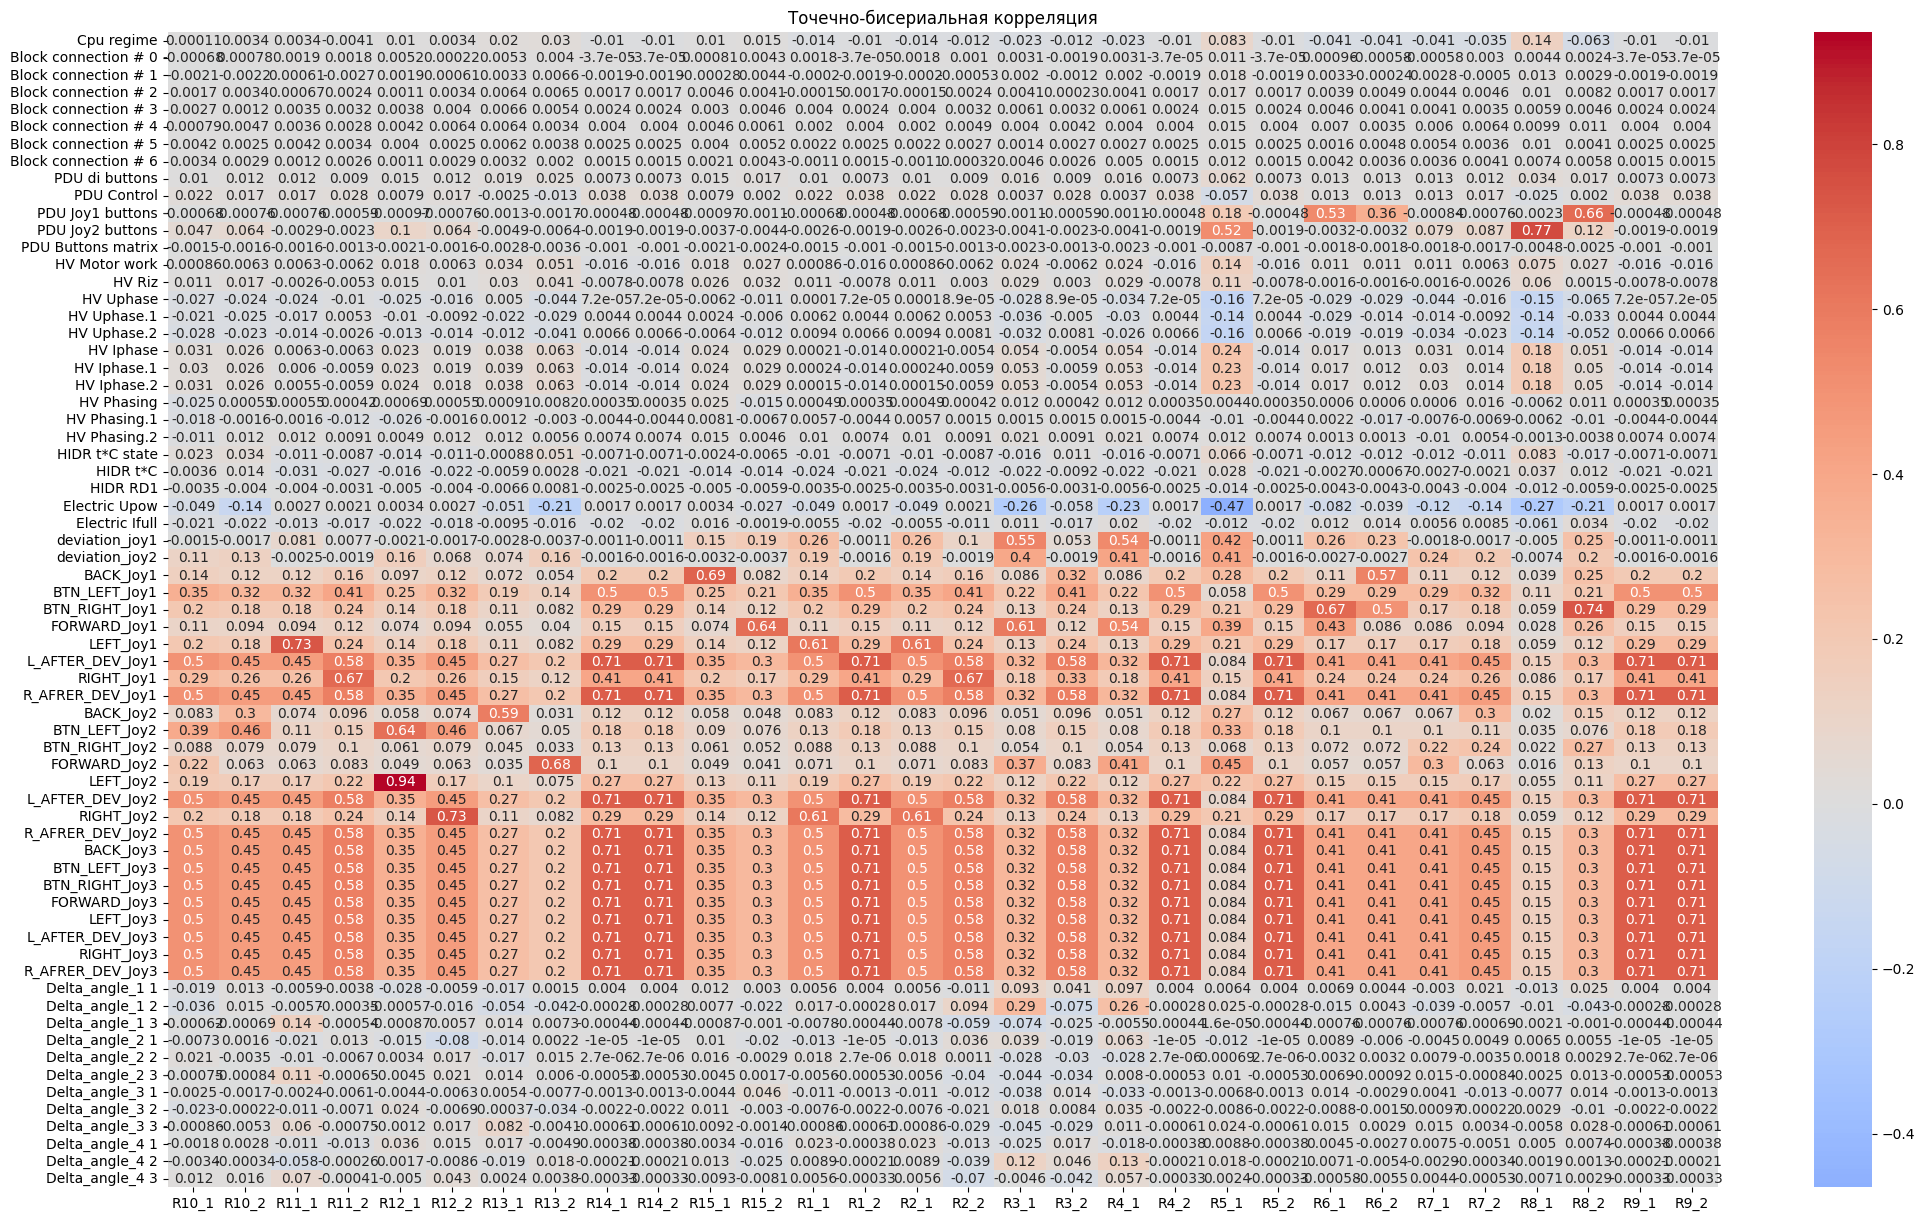

In [263]:
plt.figure(figsize=(25, 15))
sns.heatmap(pbs_corrs.astype(float), annot=True, cmap='coolwarm', center=0)
plt.title("Точечно-бисериальная корреляция")
plt.show()

In [264]:
selected_features_corr = []

for i in range(len(pbs_corrs)):
    if any([abs(corr) >= 0.58 for corr in pbs_corrs.iloc[i]]):
        selected_features_corr.append(i)

In [265]:
selected_features_corr = list(pbs_corrs.iloc[selected_features_corr].index)

In [266]:
len(selected_features_corr)

24

Mutual information

In [267]:
from sklearn.feature_selection import mutual_info_classif
from tqdm import tqdm

mi_scores = pd.DataFrame(index=feature_columns, columns=target_columns)

X = data_1[feature_columns]

for y_col in tqdm(target_columns):
    scores = mutual_info_classif(X, data_1[y_col], random_state=42)
    mi_scores[y_col] = scores

100%|██████████| 30/30 [00:19<00:00,  1.54it/s]


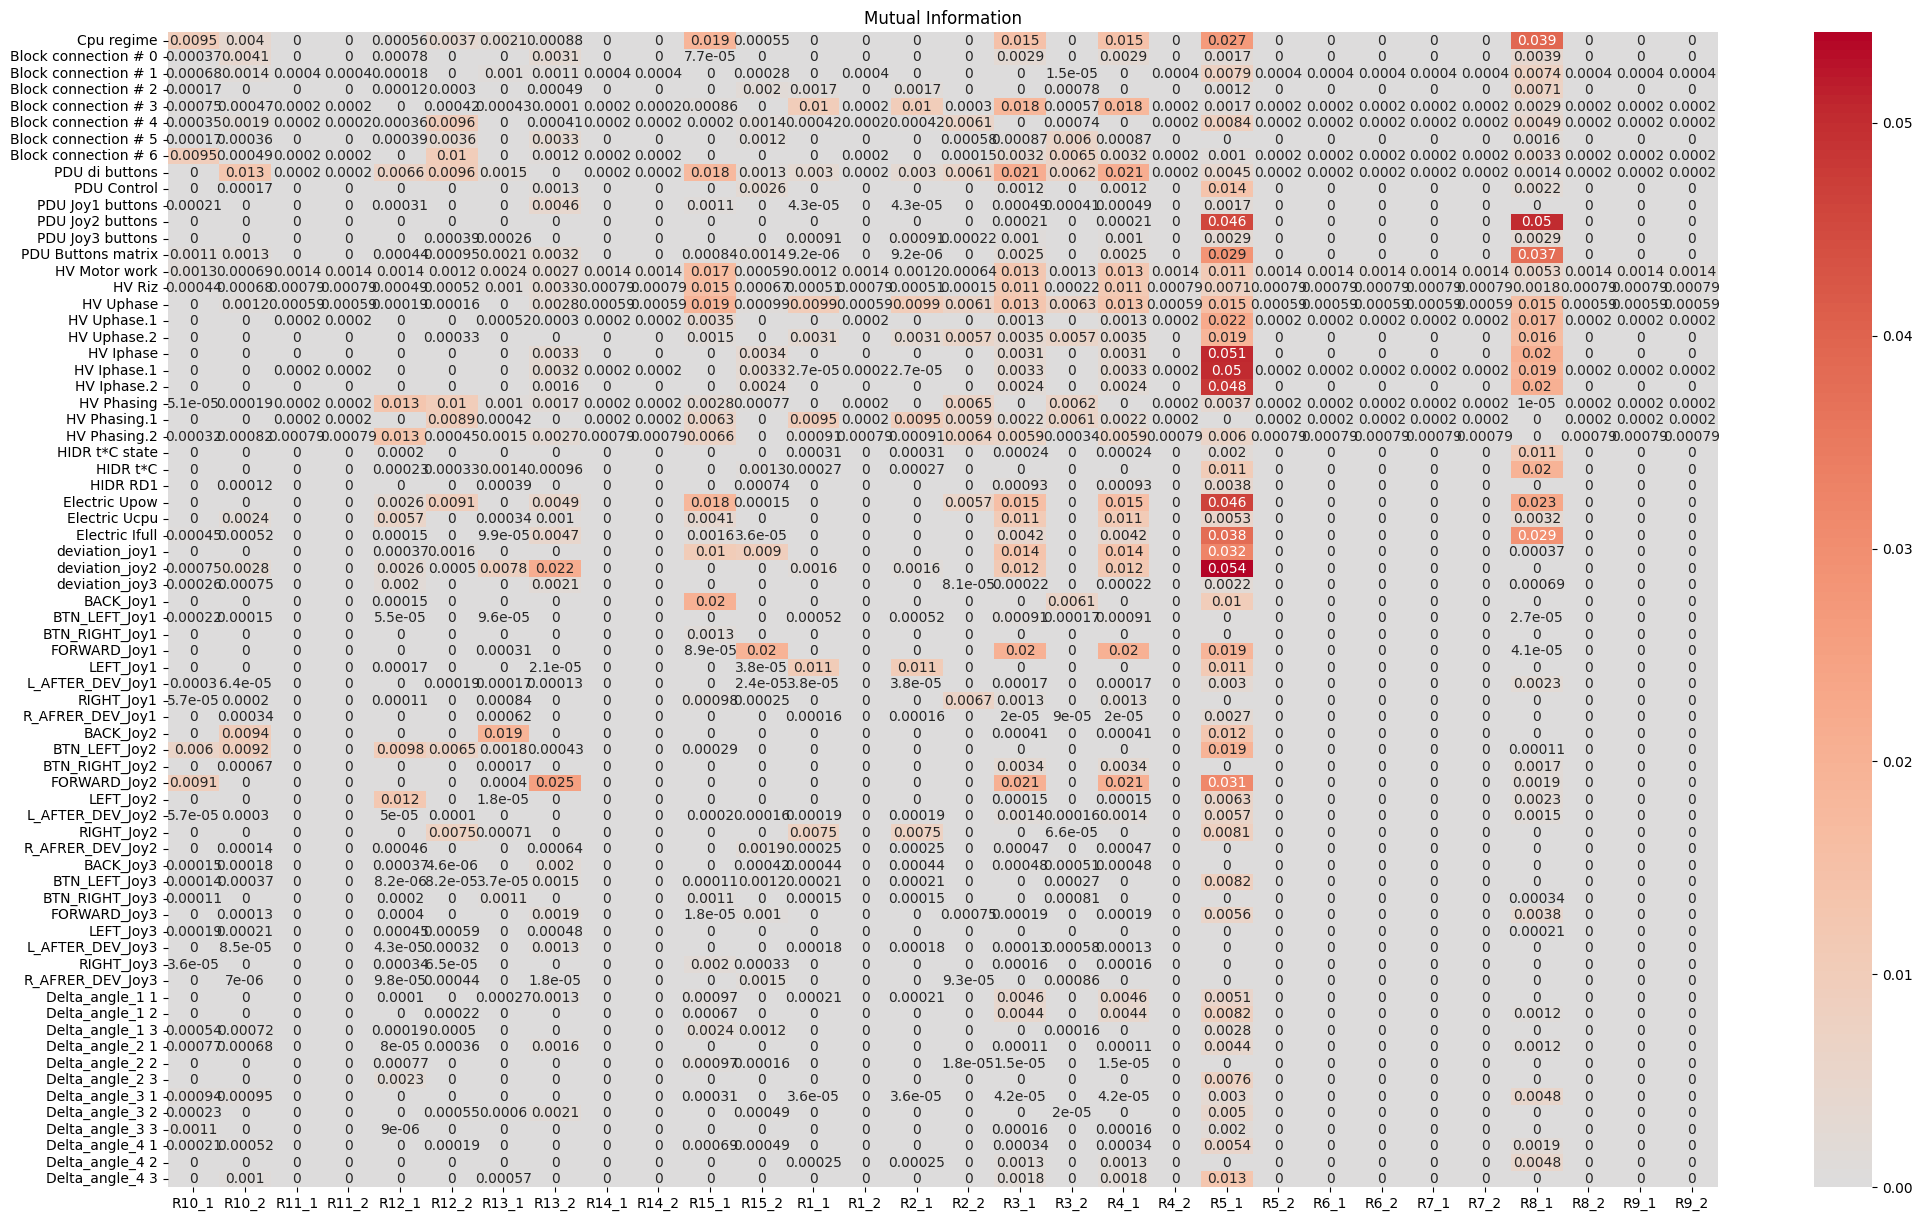

In [268]:
plt.figure(figsize=(25, 15))
sns.heatmap(mi_scores.astype(float), annot=True, cmap='coolwarm', center=0)
plt.title("Mutual Information")
plt.show()

Нормализация + PCA

In [269]:
data = pd.concat([data_1, data_2])

In [270]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()

data_scaled = scaler.fit_transform(data[feature_columns])
data_scaled

array([[ -1.81477202, -10.22859186, -10.15456687, ...,  -0.02230852,
         -0.01264121,  -0.01982865],
       [ -1.81477202, -10.22859186, -10.15456687, ...,  -0.02230852,
         -0.01264121,  -0.01982865],
       [ -1.81477202, -10.22859186, -10.15456687, ...,  -0.02230852,
         -0.01264121,  -0.01982865],
       ...,
       [  0.61090823,   0.26002086,   0.04385683, ...,  -0.02230852,
         -0.01264121,  -0.01982865],
       [  0.61090823,   0.26002086,   0.04385683, ...,  -0.02230852,
         -0.01264121,  -0.01982865],
       [  0.61090823,   0.05024861,   0.04385683, ...,  -0.02230852,
         -0.01264121,  -0.01982865]])

In [271]:
pca = PCA()

data_pca = pca.fit_transform(data_scaled)
evr = pca.explained_variance_ratio_
cvr = np.cumsum(evr)
print(evr, cvr)

[2.07482081e-01 1.02306681e-01 8.40176934e-02 4.51219102e-02
 4.21749620e-02 3.68842629e-02 3.30209655e-02 2.85928941e-02
 2.48266354e-02 2.44348651e-02 2.28808302e-02 2.14764692e-02
 2.00159987e-02 1.77795596e-02 1.70448423e-02 1.58761723e-02
 1.57959859e-02 1.56341346e-02 1.44401161e-02 1.39981637e-02
 1.33511756e-02 1.27460383e-02 1.25239693e-02 1.17365323e-02
 1.07955722e-02 9.79680932e-03 9.72976497e-03 9.36025747e-03
 9.19605977e-03 8.97297101e-03 8.66883010e-03 8.65291914e-03
 8.31385436e-03 8.10239445e-03 6.67924625e-03 6.59707036e-03
 6.37443394e-03 5.73821594e-03 5.62995376e-03 4.09338177e-03
 3.09443804e-03 2.66369369e-03 2.52994142e-03 2.39400380e-03
 2.06757156e-03 2.01385598e-03 1.32812499e-03 1.01876751e-03
 7.51896606e-04 4.85583953e-04 3.18296628e-04 2.37017534e-04
 2.22484939e-04 6.02770664e-06 3.62197622e-06 1.11463096e-17
 9.69002500e-18 7.95072859e-18 7.59975743e-18 3.81311365e-18
 2.78741808e-18 2.10210027e-18 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.000000

In [290]:
n_components = np.argmax(cvr >= 0.9) + 1
n_components

29

In [291]:
pca = PCA(n_components=n_components)
data_reduced = pca.fit_transform(data_scaled)
print(data.shape[1], data_reduced.shape[1])

100 29


In [292]:
pbs_corrs = pd.DataFrame(index=feature_columns, columns=target_columns)

for target in target_columns:
    for i in range(data_reduced.shape[1]):
        if np.issubdtype(data_reduced[:,i].dtype, np.number) and np.issubdtype(data[target].dtype, np.number):
            try:
                corr, _ = pointbiserialr(data_reduced[:,i], data[target])
                pbs_corrs.loc[str(i), target] = corr
            except:
                pbs_corrs.loc[str(i), target] = np.nan
        else:
            pbs_corrs.loc[str(i), target] = np.nan

pbs_corrs = pbs_corrs.dropna(how='all', axis=0).dropna(how='all', axis=1)

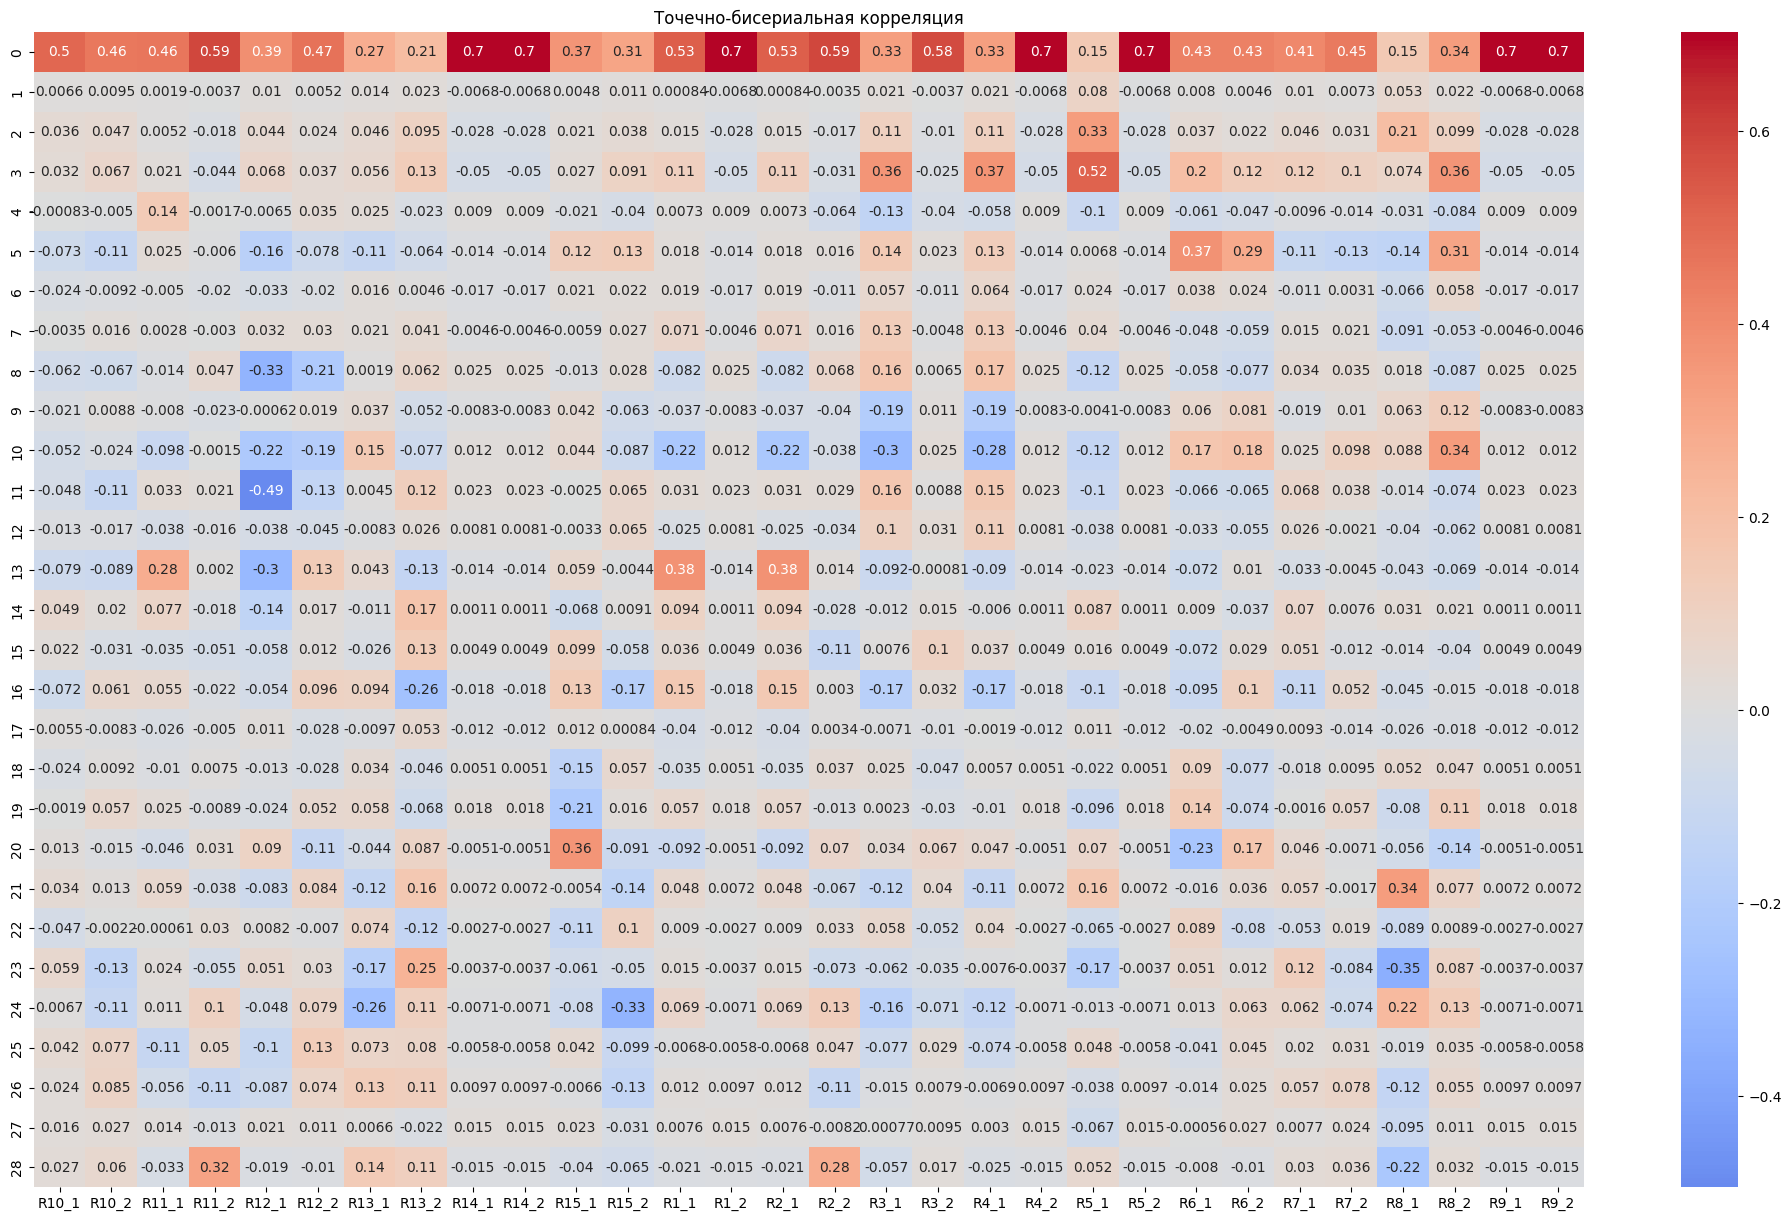

In [293]:
plt.figure(figsize=(25, 15))
sns.heatmap(pbs_corrs.astype(float), annot=True, cmap='coolwarm', center=0)
plt.title("Точечно-бисериальная корреляция")
plt.show()

# ОТБОР ФИЧ (CATBOOST)

In [37]:
from catboost import MultiTargetCustomMetric

class CustomMultiLabelMetric(MultiTargetCustomMetric):
    def __init__(self):
        self._name = 'CustomF1'
        
        self._greater_is_better = True

    def evaluate(self, approxes, targets, weights):
        preds = [np.array(a > 0.5, dtype=int) for a in approxes]
        targets = [np.array(t, dtype=int) for t in targets]
        
        f1_scores = []
        for pred, target in zip(preds, targets):
            tp = np.sum((pred == 1) & (target == 1))
            fp = np.sum((pred == 1) & (target == 0))
            fn = np.sum((pred == 0) & (target == 1))
            
            precision = tp / (tp + fp + 1e-9)
            recall = tp / (tp + fn + 1e-9)
            f1 = 2 * (precision * recall) / (precision + recall + 1e-9)
            f1_scores.append(f1)
        
        return np.mean(f1_scores), len(targets[0])

    def is_max_optimal(self):
        return self._greater_is_better

    def get_final_error(self, error, weight):
        return error


# MODELLING

Catboost

In [39]:
from catboost import CatBoostClassifier, Pool

In [40]:
selected_features1 = ['Cpu regime', 'Block connection # 0', 'Block connection # 1', 'Block connection # 4', 'Block connection # 5', 'Block connection # 6', 'PDU Joy2 buttons', 'PDU Buttons matrix', 'HV Uphase', 'HV Uphase.1', 'HV Uphase.2', 'HV Iphase', 'HV Iphase.1', 'HV Iphase.2', 'HV Phasing.2', 'HIDR t*C', 'Electric Upow', 'Electric Ucpu', 'Electric Ifull', 'deviation_joy1', 'deviation_joy2', 'BACK_Joy1', 'FORWARD_Joy1', 'LEFT_Joy1', 'RIGHT_Joy1', 'R_AFRER_DEV_Joy1', 'BACK_Joy2', 'BTN_LEFT_Joy2', 'FORWARD_Joy2', 'LEFT_Joy2', 'L_AFTER_DEV_Joy2', 'RIGHT_Joy2', 'BACK_Joy3', 'FORWARD_Joy3', 'Delta_angle_1 1', 'Delta_angle_2 2', 'Delta_angle_2 3', 'Delta_angle_3 1', 'Delta_angle_4 1', 'Delta_angle_4 2']
selected_features2 = ['Cpu regime', 'Block connection # 4', 'Block connection # 5', 'PDU Joy2 buttons', 'PDU Buttons matrix', 'HV Uphase.1', 'HV Iphase', 'HV Iphase.1', 'HV Iphase.2', 'HIDR t*C', 'Electric Upow', 'deviation_joy1', 'deviation_joy2', 'BACK_Joy1', 'FORWARD_Joy1', 'LEFT_Joy1', 'RIGHT_Joy1', 'R_AFRER_DEV_Joy1', 'BACK_Joy2', 'BTN_LEFT_Joy2', 'FORWARD_Joy2', 'LEFT_Joy2', 'RIGHT_Joy2', 'BTN_LEFT_Joy3', 'FORWARD_Joy3', 'Delta_angle_1 1', 'Delta_angle_2 2', 'Delta_angle_2 3', 'Delta_angle_4 1', 'Delta_angle_4 2']

In [54]:
from sklearn.model_selection import train_test_split, TimeSeriesSplit

"""X = data_1[selected_features1]"""
"""y = np.array(data_1[target_columns])"""

tscv = TimeSeriesSplit(n_splits=4)

In [42]:
model_final = CatBoostClassifier(
    iterations=10000,
    learning_rate=1e-3,
    depth=3,
    verbose=0,
    loss_function='MultiLogloss',
    eval_metric=CustomMultiLabelMetric()
)

In [45]:
for train_idx, test_idx in tscv.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    train_pool = Pool(X_train, y_train)
    test_pool = Pool(X_test, y_test)

    try:
        model_final.fit(train_pool, eval_set=test_pool)
        print(f"Test Score: {model_final.best_score_['validation']['CustomMultiLabelMetric']}")
    except:
        continue

Test Score: 0.21914255662028406
Test Score: 0.3453331249611544
Test Score: 0.22699389485473942
Test Score: 0.30832955957161357


TF LSTM

In [303]:
X = data_reduced
y = data[target_columns].to_numpy()

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from keras_tuner import RandomSearch

In [2]:
from tensorflow.keras.metrics import Metric
from tensorflow.keras import backend as K

class F1Score(Metric):
    def __init__(self, name='f1_score', **kwargs):
        super().__init__(name=name, **kwargs)
        self.precision = tf.keras.metrics.Precision()
        self.recall = tf.keras.metrics.Recall()

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_pred = tf.round(y_pred)
        self.precision.update_state(y_true, y_pred, sample_weight)
        self.recall.update_state(y_true, y_pred, sample_weight)

    def result(self):
        p = self.precision.result()
        r = self.recall.result()
        return 2 * ((p * r) / (p + r + K.epsilon()))

    def reset_state(self):
        self.precision.reset_state()
        self.recall.reset_state()

In [3]:
def create_sequences(data_X, data_y, seq_length):
    X, y = [], []

    for i in range(len(data_X) - seq_length):
        X.append(data_X[i:i + seq_length])
        y.append(data_y[i:i + seq_length])
    
    return np.array(X), np.array(y)

In [52]:
seq_length = 64

X_tf, y_tf = create_sequences(X, y, seq_length)

print(f'X shape: {X_tf.shape}\ny shape: {y_tf.shape}')

X shape: (3959, 64, 28)
y shape: (3959, 64, 30)


In [55]:
X_tf_train, X_tf_test, y_tf_train, y_tf_test = train_test_split(X_tf, y_tf, test_size=0.3, random_state=42)

In [61]:
from sklearn.metrics import f1_score

Only high corr targets

In [304]:
def calculate_f1_per_target(y_true, y_pred, target_names=None, average='macro', threshold=0.5):
    y_pred_binary = (y_pred > threshold).astype(int)
    
    if target_names is None:
        target_names = [f'target_{i}' for i in range(y_true.shape[2])]
    else:
        assert len(target_names) == y_true.shape[2], f"Target names assert error target_names: {len(target_names)} != y_shape: {y_true.shape[2]}"
    
    results = {}
    for i, name in enumerate(target_names):
        true_single = y_true[:, :, i].reshape(-1)
        pred_single = y_pred_binary[:, :, i].reshape(-1)
        
        try:
            f1 = f1_score(true_single, pred_single, average=average, zero_division=0)
            results[name] = f1
        except ValueError as e:
            print(f"Ошибка для {name}: {str(e)}")
            results[name] = np.nan
    
    return results

In [305]:
X_tf, y_tf = create_sequences(X, y, seq_length)

In [306]:
X_tf_train, X_tf_test, y_tf_train, y_tf_test = train_test_split(X_tf, y_tf, test_size=0.3, shuffle=False)

In [308]:
model_tf_corr = Sequential()

model_tf_corr.add(Input((seq_length, X_tf.shape[2])))
model_tf_corr.add(LSTM(256, return_sequences=True))
model_tf_corr.add(Dropout(0.4))
model_tf_corr.add(LSTM(96, return_sequences=True))
model_tf_corr.add(Dropout(0.4))
model_tf_corr.add(Dense(30))

In [ ]:
model_tf_corr.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=[F1Score()])

In [310]:
model_tf_corr.fit(X_tf_train, y_tf_train, epochs=100, validation_data=(X_tf_test, y_tf_test))

Epoch 1/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 14s 77ms/step - f1_score: 0.2447 - loss: 0.0304 - val_f1_score: 0.0821 - val_loss: 5.8751e-04
Epoch 2/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 11s 74ms/step - f1_score: 0.5496 - loss: 0.0110 - val_f1_score: 0.7074 - val_loss: 3.0183e-04
Epoch 3/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 11s 74ms/step - f1_score: 0.7617 - loss: 0.0069 - val_f1_score: 0.7386 - val_loss: 1.2543e-04
Epoch 4/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 11s 72ms/step - f1_score: 0.8672 - loss: 0.0048 - val_f1_score: 0.7580 - val_loss: 8.6661e-05
Epoch 5/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 12s 78ms/step - f1_score: 0.8779 - loss: 0.0047 - val_f1_score: 0.7650 - val_loss: 8.4190e-05
Epoch 6/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 12s 75ms/step - f1_score: 0.9303 - loss: 0.0034 - val_f1_score: 0.7718 - val_loss: 6.7629e-05
Epoch 7/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 12s 77ms/step - f1_score: 0.9326 - loss: 0.0036 - val_f1_score: 0.7935 - val_loss: 4.9084e-05
Epoch 8/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 12s 77ms/step 

In [311]:
preds = model_tf_corr.predict(X_tf_test)

66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step


In [312]:
calculate_f1_per_target(y_tf_test, preds, target_columns)

{'R10_1': 1.0,
 'R10_2': 1.0,
 'R11_1': 1.0,
 'R11_2': 1.0,
 'R12_1': 1.0,
 'R12_2': 1.0,
 'R13_1': 1.0,
 'R13_2': 1.0,
 'R14_1': 1.0,
 'R14_2': 1.0,
 'R15_1': 0.9920597504727173,
 'R15_2': 1.0,
 'R1_1': 1.0,
 'R1_2': 1.0,
 'R2_1': 1.0,
 'R2_2': 1.0,
 'R3_1': 1.0,
 'R3_2': 1.0,
 'R4_1': 1.0,
 'R4_2': 1.0,
 'R5_1': 1.0,
 'R5_2': 1.0,
 'R6_1': 1.0,
 'R6_2': 0.49999626014435844,
 'R7_1': 1.0,
 'R7_2': 1.0,
 'R8_1': 1.0,
 'R8_2': 1.0,
 'R9_1': 1.0,
 'R9_2': 1.0}